# Load Data

First step in a data project is to load the data. We'll load a credit dataset it into a pandas dataframe, and split it into test and train sets.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('data/credit.csv')
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,effort,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,"(0.00649, 0.04]",9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,"(0.000309, 0.00134]",2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,"(0.000309, 0.00134]",3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,"(0.000309, 0.00134]",3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,"(-0.001, 0.000309]",63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,"(0.00367, 0.00468]",3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,"(0.00214, 0.00287]",2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,"(0.00649, 0.04]",5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,"(-0.001, 0.000309]",5716.0,4,0,0,0,0.0


In [3]:
df_train, df_test = train_test_split(data, test_size=0.3)


# Learn Synthesizer

Now that the data is loaded, we can import the `HighDimSynthesizer` and learn the data.

In [4]:
from synthesized import HighDimSynthesizer, MetaExtractor
from synthesized.insight.modelling import ModellingPreprocessor


Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: XXXX-XXXX-XXXX-XXXX-XXXX-XXXX-XXXX-XXXX
Expires at: 2021-12-31 00:00:00


In [5]:
df_meta = MetaExtractor.extract(df_train)
synthesizer = HighDimSynthesizer(df_meta)

synthesizer.learn(df_train, num_iterations=None)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


After the model is trained, it can be exported with the following command, in case you terminate your session for today and you want to keep investigating tomorrow without waiting for it to learn:
```
with open("model.syn", "bw") as fp:
    synthesizer.export_model(fp)
    
with open("model.syn", "br") as fp:
    synthesizer = HighDimSynthesizer.import_model(fp)
```

In [6]:
df_synth = synthesizer.synthesize(len(df_train))
df_synth.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,effort,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.039395,55,0,"(0.00468, 0.00649]",929.005005,8,0,0,0,2.0
1,0,0.738396,28,0,"(-0.001, 0.000309]",469.453827,2,0,0,0,0.0
2,0,0.057013,45,0,"(-0.001, 0.000309]",4000.000000,3,0,0,0,0.0
3,0,0.992518,46,0,"(0.00367, 0.00468]",4815.916016,7,0,2,0,3.0
4,0,0.306971,49,2,"(0.00287, 0.00367]",12371.119141,12,0,0,0,1.0
5,0,0.934197,39,0,"(-0.001, 0.000309]",2900.000000,0,0,0,0,1.0
6,0,0.804135,22,0,"(0.000309, 0.00134]",2249.391357,4,0,0,0,1.0
7,0,0.563810,50,0,"(0.00367, 0.00468]",8450.710938,7,0,2,0,4.0
8,0,0.049335,47,0,"(12.67, 3296.64]",0.000000,14,0,2,0,0.0
9,0,0.078156,49,0,"(0.00134, 0.00214]",6500.000000,8,0,2,0,2.0


# Compare Data

Let's look at the synthesized data, and compare it to the original data with two simple checks, first we'll look at the marginal distributions and then we'll check the performance of a classifier in both datasets.

In [7]:
from sklearn.linear_model import LogisticRegression

from synthesized.testing import Assessor

## Compare Marginal Distributions

Let's use the `Assessor` object to compare original and Synthesized distributions for each column

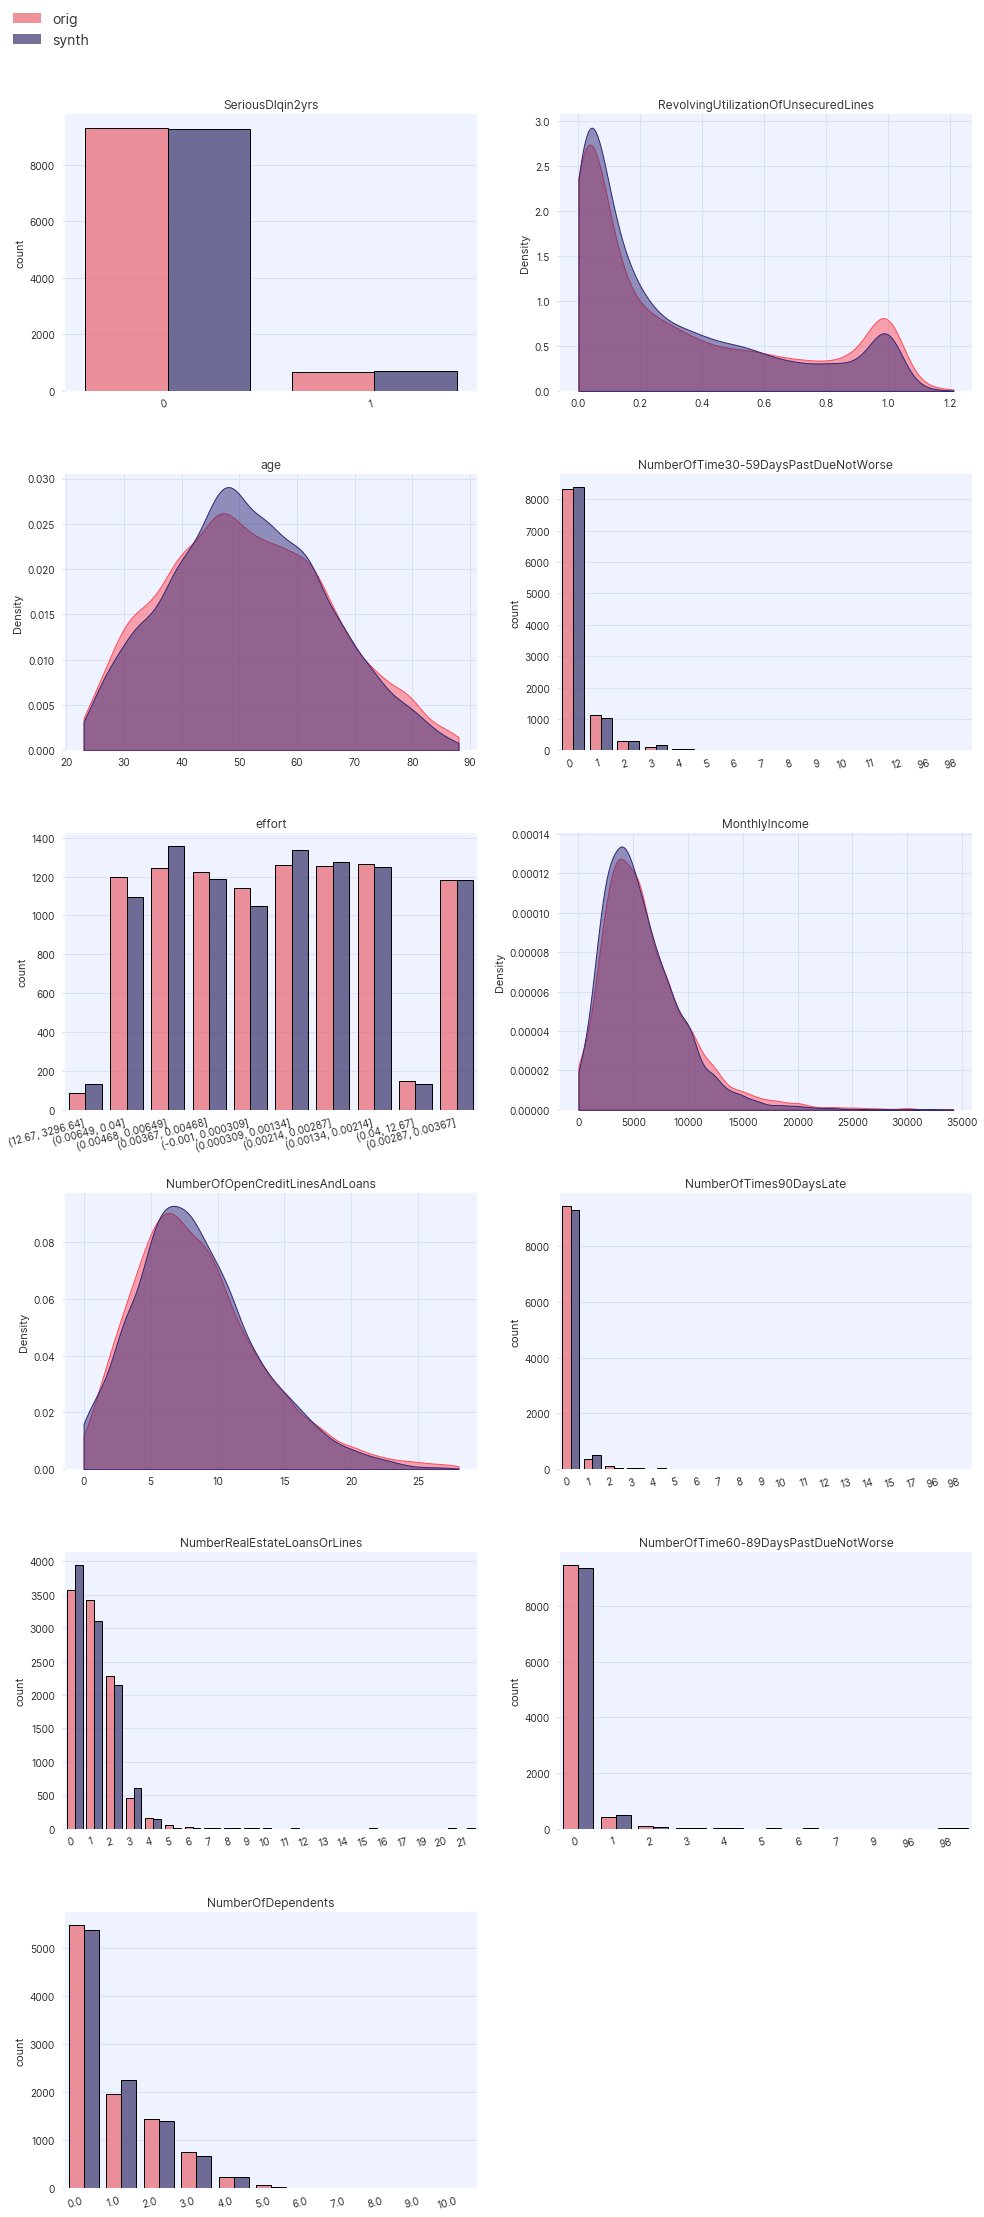

In [8]:
asr = Assessor(df_meta=df_meta, df_orig=df_train, df_synth=df_synth)
asr.show_distributions(remove_outliers=0.01)

## Train a Classifier

And we can see that if we train a classifier, the results are almos the same with both datasets.

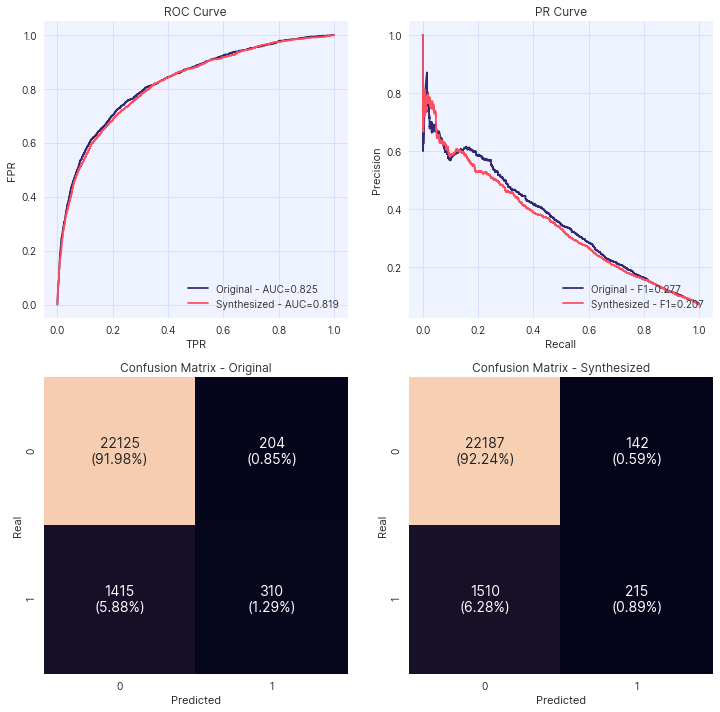

In [9]:
target = 'SeriousDlqin2yrs'

classifier = LogisticRegression(max_iter=1000)
asr.plot_classification_metrics(target, df_test, classifier)

# Data Reshaping

We can use the model to reshape the data distributions. In this case, we are predicting delinquency, but only 7% of samples correspond to a delinquent user. We can use `ConditionalSampler` to generate a Synthesized dataset with same number of delinquent and non-delinquent users.

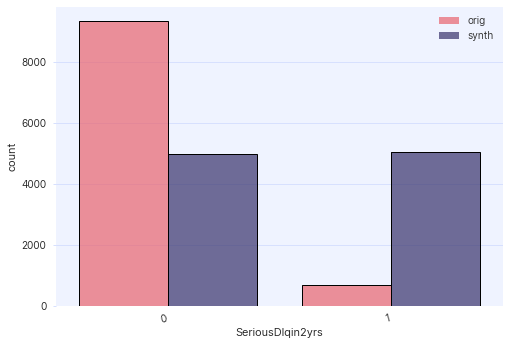

In [24]:
df_synth = synthesizer.synthesize(10_000)

categorical_distribution_plot(df_train[target], df_synth[target])

In [10]:
from synthesized.complex import ConditionalSampler

cond = ConditionalSampler(synthesizer)
df_cond = cond.synthesize(num_rows=len(df_test), 
                          explicit_marginals={target: {'0': 0.5, '1': 0.5}})

In [11]:
from synthesized.testing.plotting import categorical_distribution_plot, continuous_distribution_plot
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


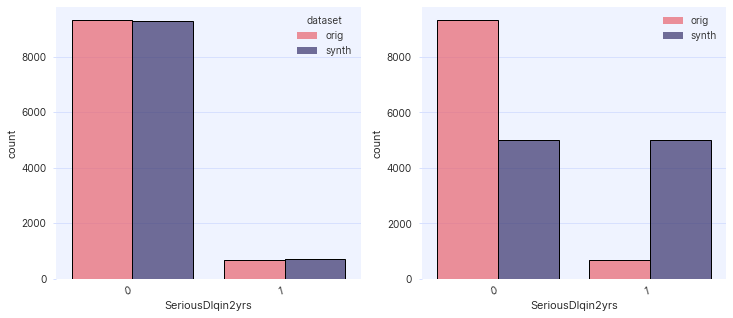

In [12]:
_, axs = plt.subplots(1, 2, figsize=(12, 5))

categorical_distribution_plot(df_train[target], df_synth[target], ax=axs[0])
categorical_distribution_plot(df_train[target], df_cond[target], ax=axs[1])

And we can see below that, if we train a classifier with the rebalanced dataet, the F1-score is increased from 0.266 to 0.317, and the number of *False Negatives* (which is usually more costly errors type) if halved.

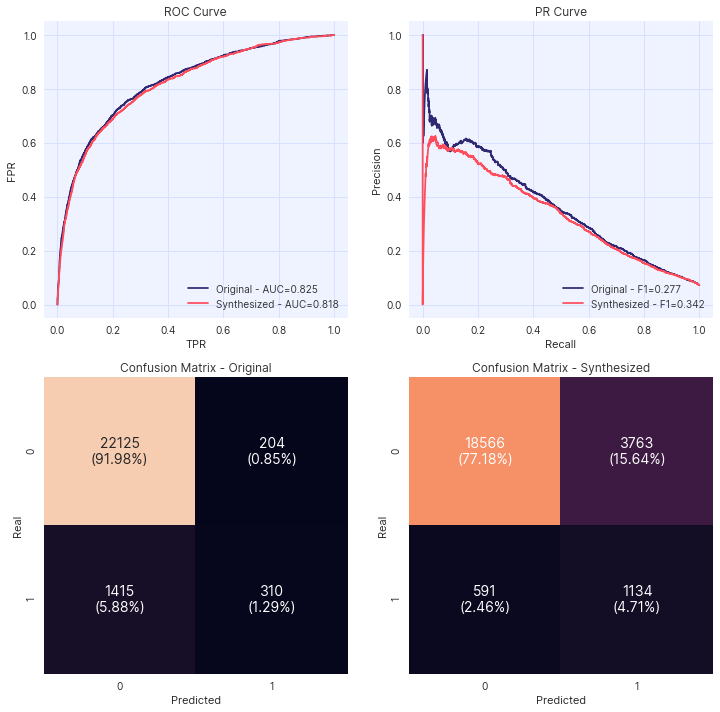

In [13]:
classifier = LogisticRegression(max_iter=1000)
asr = Assessor(df_meta=df_meta, df_orig=df_train, df_synth=df_cond)
asr.plot_classification_metrics(target, df_test, classifier)

Similarly, we can use `ConditionalSampler.alter_distributions(df)` to alter the distributions of a given `df: pd.DataFrame` and generate a new dataframe that contains a mix of original and Synthesized data, and the distributions desired by the user.

In [14]:
df_orig_cond = cond.alter_distributions(df=data,
                                        num_rows=2 * len(df_test), 
                                        explicit_marginals={'SeriousDlqin2yrs': {'0': 0.5, '1': 0.5}})

# Simulated Data Scenarios

The Synthesized data can also be used for backtesting in different scenarios, and make sure the model is robust to population shifts.

For example, let's generate two datasets, one with users over 60 years old and anotherone with people under 40, and compare model performance in both segments.

In [17]:
cond = ConditionalSampler(synthesizer)
df_over_60 = cond.synthesize(num_rows=len(df_test), 
                             explicit_marginals={'age': {'[60.0, 100.0)': 1}})
df_under_40 = cond.synthesize(num_rows=len(df_test), 
                              explicit_marginals={'age': {'[0.0, 40.0)': 1}})


We can observe that, as expected, delinquency rate for the segment over 60 is lower, and the segment under 40 have more delinquents. 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


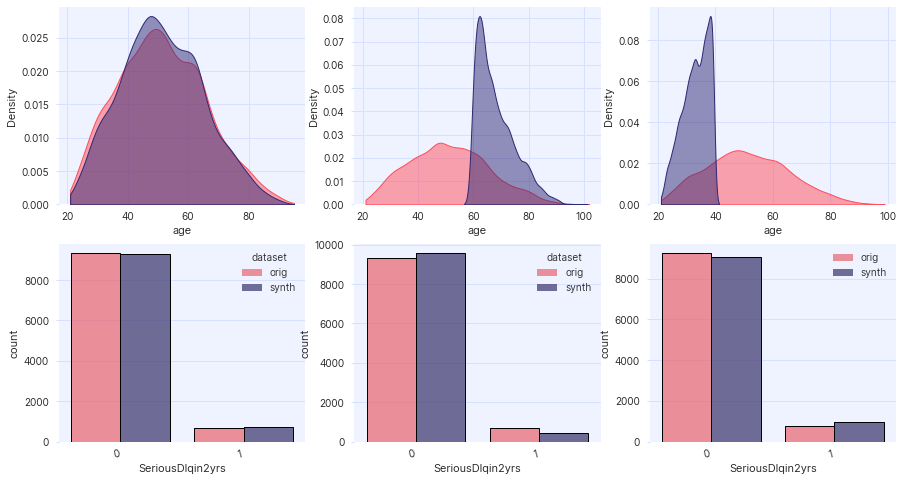

In [18]:
_, axs = plt.subplots(2, 3, figsize=(15, 8))

continuous_distribution_plot(df_train['age'], df_synth['age'], ax=axs[0,0])
continuous_distribution_plot(df_train['age'], df_over_60['age'], ax=axs[0,1])
continuous_distribution_plot(df_train['age'], df_under_40['age'], ax=axs[0,2])
categorical_distribution_plot(df_train[target], df_synth[target], ax=axs[1,0])
categorical_distribution_plot(df_train[target], df_over_60[target], ax=axs[1,1])
categorical_distribution_plot(df_train[target], df_under_40[target], ax=axs[1,2])


Below, the results of training a classifier with the original dataframe but evaluating it on both segments. The model performs worse for the segment over 60 years old.

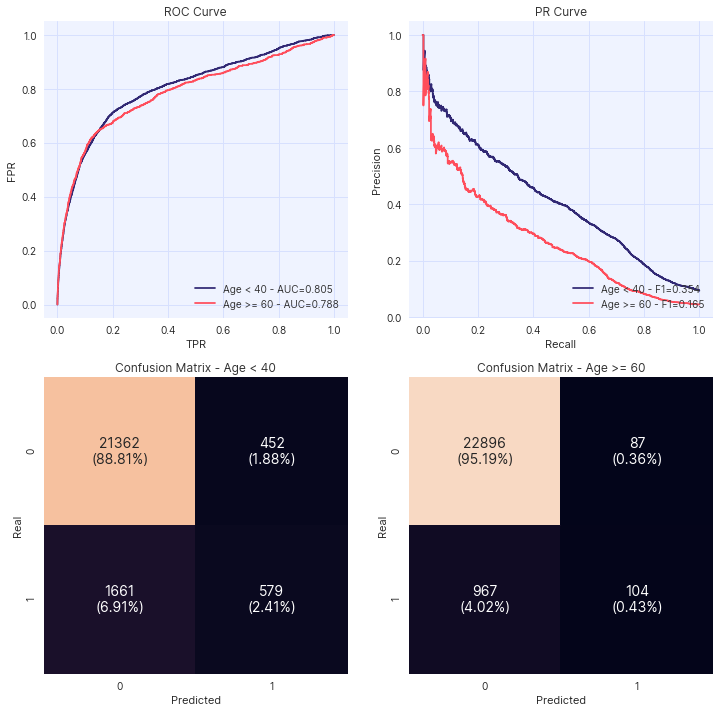

In [20]:
from synthesized.insight.metrics.modelling_metrics import plot_classification_metrics_test

plot_classification_metrics_test(df_meta, target, df_train, df_under_40, df_over_60, LogisticRegression(max_iter=1000), names=("Age < 40", "Age >= 60"))